# Отчет

Производилось семплирование элементов из входящего потока (смотрите <b>sampling.cpp</b> функция sample(..)) для трех случаев:
1. вес i-го элемента равен 1 (равномерное семплирование);
2. вес i-го элемента равен i;
3. вес i-го элемента равен i\*i.

С целью наглядности при семплировании использовался поток, представляющий собой упорядоченную последовательность чисел от 0 до N-1, где N - размер потока (смотрите <b>sampling.cpp</b> функция initialize_stream(..)). Ниже на графиках представлены гистограммы для размеров входящего потока 100/1000/10000 (первая часть в названии графика) и размеров семпла 5/10/20/100 (вторая часть в названии графика). Суффиксы eq, i и ii в названиях графиков соответствуют случаям 1-3, описанным выше.

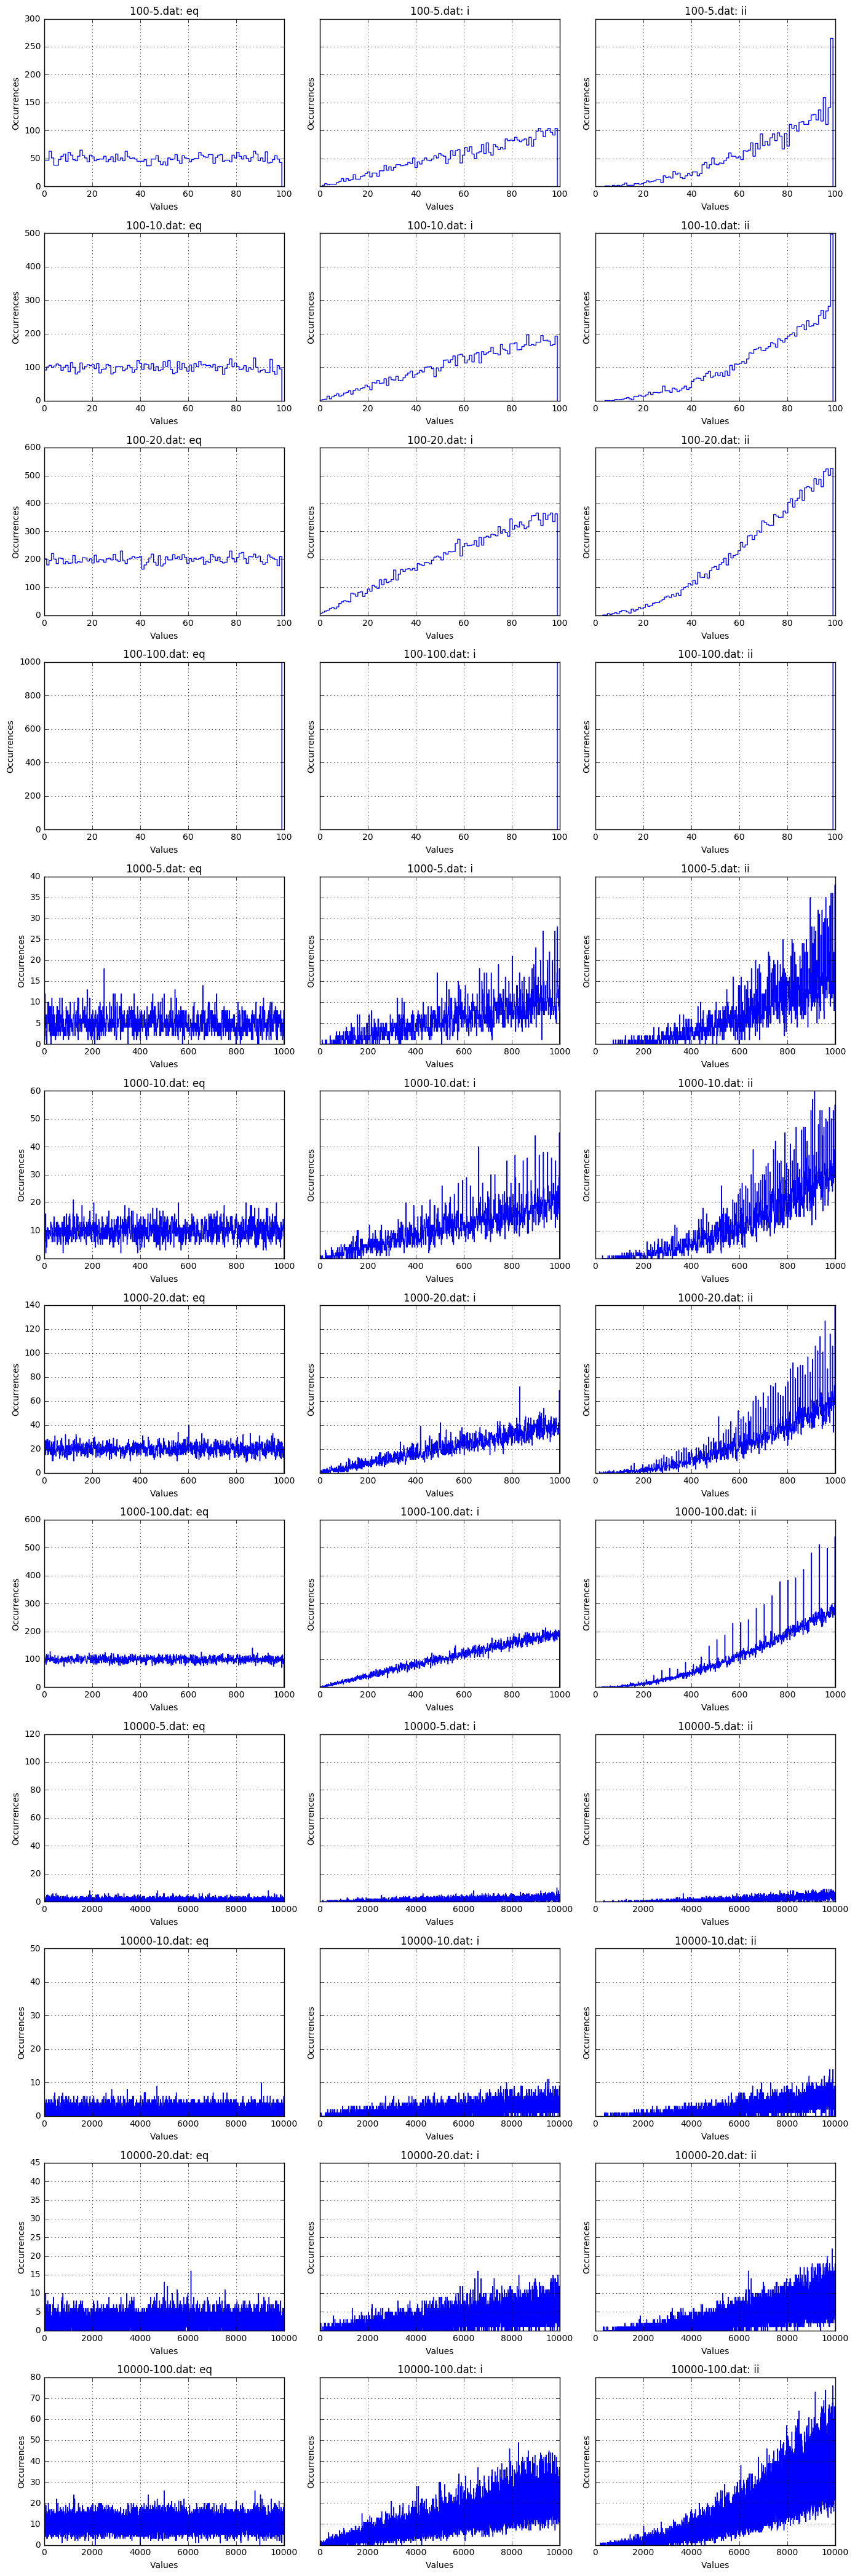

In [38]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


def parse_dat(filename):
    result = []
    with open(filename, "r") as f:
        for i in xrange(3):
            sample_size = int(f.next())
            sample = []
            for j in xrange(sample_size):
                sample.append(int(f.next()))
            result.append(sample)
    return result

def draw(ax, title, data, stream_size):
    ax.set_title(title)
    ax.hist(data, bins=stream_size, histtype='step')
    ax.set_xlabel("Values")
    ax.set_ylabel("Occurrences")
    ax.legend(loc='best', frameon=False)
    ax.grid(True)

fig, axes = plt.subplots(12, 3, sharey="row", figsize=(14,42))
ofs = ["100-5.dat", "100-10.dat", "100-20.dat", "100-100.dat", 
       "1000-5.dat", "1000-10.dat", "1000-20.dat", "1000-100.dat", 
       "10000-5.dat", "10000-10.dat", "10000-20.dat", "10000-100.dat"]

for j in xrange(12):
    of = ofs[j]
#     stream_size = int(of.split("-")[0])
    eq, i, ii = parse_dat(of)
    draw(axes[j][0], of + ": eq", eq, len(set(eq)))
    draw(axes[j][1], of + ": i", i, len(set(i)))
    draw(axes[j][2], of + ": ii", ii, len(set(ii)))
    
plt.tight_layout()